# Multistart Gradient-based Optimization

Multistart gradient-based optimization is a simple method to find the global optimum of a function. It involves gradient-based optimization with different starting points and finally selecting the best optimum value. As described in previous section, [Jones function](intro:jones-function) will be used to demonstrate the method.

Below block of code imports all the required packages and defines various functions to be used in the optimization process:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

def jones_function(x):
    """
        Function to evaluate values of jones function at any given x.
        
        Input:
        x - 1d numpy array containing only two entries. First entry is x1
        and 2nd entry is x2.
    """
    
    # Number of dimensions of input
    dim = x.ndim

    # Converting to 2D numpy array if input is 1D
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]

    y = x1**4 + x2**4 - 4*x1**3 - 3*x2**3 + 2*x1**2 + 2*x1*x2

    y = y.reshape(-1,1)
    
    if dim == 1:
        y = y.reshape(-1,)

    return y

def plot_jones_function(ax=None):
    """
        Function which plots the jones function

        Input:
        ax (optional) - matplotlib axis object. If not provided, a new figure is created

        Returns ax object containing jones function plot
    """

    num_points = 50

    # Defining x and y values
    x = np.linspace(-2,4,num_points)
    y = np.linspace(-2,4,num_points)

    # Creating a mesh at which values will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = jones_function(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

    Z = Z.reshape(X.shape)

    # Denoting at which level to add contour lines
    levels = np.arange(-13,-5,1)
    levels = np.concatenate((levels, np.arange(-4, 8, 3)))
    levels = np.concatenate((levels, np.arange(10, 100, 15)))

    # Plotting the contours
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,5))

    CS = ax.contour(X, Y, Z, levels=levels, colors="k", linestyles="solid", alpha=0.5)
    ax.clabel(CS, inline=1, fontsize=8)
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Jones Function", fontsize=14)

    return ax

def jones_opt_history(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value which is later
        for plotting convergence history.
        
        Input: 
        x - 1d numpy array which contains current x values
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(jones_function(x))

def jones_opt_plots(ax, history, starting_point, result):
    """
        Function used for plotting the results of the optimization.
        
        Input:

        ax - matplotlib axis object which contains the plot of jones function

        history - A dictionary which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.

        starting_point - A 1D numpy array containing the starting point of the
        optimization.

        result - A scipy.optimize.OptimizeResult object which contains the result
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1

    # Plotting optimization path
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path", zorder=5.0, alpha=0.5, linewidth=1.5)
    ax.scatter(starting_point[0], starting_point[1], label="Starting point", c="red", zorder=10.0)
    ax.scatter(result.x[0], result.x[1], label="Final point", c="green", zorder=10.0)

Below block of code defines various optimization parameters and starting points for the optimization process. Here, 9 different starting points are used.

> **_NOTE:_** The number of starting points and where to place them is problem dependent and it is upto the user to decide.

Iteration 1:
Starting point: [-1.5 -1.5]
Optimum point: [-0.44947768  2.29275272], Optimum value: [-9.77696367]

Iteration 2:
Starting point: [ 1.  -1.5]
Optimum point: [ 2.67320832 -0.67588501], Optimum value: [-13.53203478]

Iteration 3:
Starting point: [ 3.5 -1.5]
Optimum point: [ 2.67320855 -0.67588494], Optimum value: [-13.53203478]

Iteration 4:
Starting point: [-1.5  1. ]
Optimum point: [-0.44947768  2.29275275], Optimum value: [-9.77696367]

Iteration 5:
Starting point: [1. 1.]
Optimum point: [2.42387824 1.92188476], Optimum value: [-9.03120445]

Iteration 6:
Starting point: [3.5 1. ]
Optimum point: [ 2.67320839 -0.67588494], Optimum value: [-13.53203478]

Iteration 7:
Starting point: [-1.5  3.5]
Optimum point: [-0.44947766  2.29275264], Optimum value: [-9.77696367]

Iteration 8:
Starting point: [1.  3.5]
Optimum point: [-0.44947759  2.29275282], Optimum value: [-9.77696367]

Iteration 9:
Starting point: [3.5 3.5]
Optimum point: [2.42387864 1.92188501], Optimum value: [-9.03120

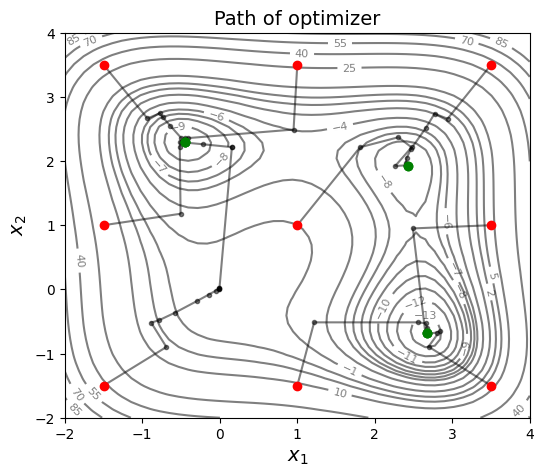

In [35]:
# Solver
method = "BFGS"

# Finite difference scheme
jac = "3-point"

# Solver options
options ={
    "disp": False
}

# Jones function
ax = plot_jones_function()
ax.set_title("Path of optimizer", fontsize=14)

# Creating starting points
num_pts = 3 # number of points in each direction
x = np.linspace(-1.5, 3.5, num_pts)
y = np.linspace(-1.5, 3.5, num_pts)
X,Y = np.meshgrid(x,y)

# Reshaping the array into 1D array
# Total points be square of num_pts
X = X.reshape(-1,)
Y = Y.reshape(-1,)

# Evaluations
nfun = 0
ngrad = 0

# Performing multistart optimization
for index in range(len(X)):
    starting_point = np.array([X[index], Y[index]])

    # Defining dict for storing history of optimization
    history = {}
    history["x1"] = [starting_point[0]]
    history["x2"] = [starting_point[1]]
    history["f"] = [jones_function(starting_point)]
    
    # Minimize the function
    result = minimize(fun=jones_function, x0=starting_point, method=method, jac=jac, options=options, callback=jones_opt_history)

    nfun += result.nfev
    ngrad += result.njev

    # Convergence plots
    jones_opt_plots(ax, history, starting_point, result)

    # Checking if the optimum found is better than current best point
    if index == 0:
        # Storing the best point
        best_point = result.x
        best_obj = jones_function(result.x)
    else:
        if jones_function(result.x) < best_obj:
            best_point = result.x
            best_obj = jones_function(result.x)
            
    print("Iteration {}:".format(index+1))
    print("Starting point: {}".format(starting_point))
    print("Optimum point: {}, Optimum value: {}\n".format(result.x, jones_function(result.x)))

print("\nResult:")
print("{} is the best value found at x1 = {} and x2 = {}.".format(best_obj, best_point[0], best_point[1]))
print("Number of function evaluations: {}".format(nfun))
print("Number of gradient evaluations: {}".format(ngrad))

As can be seen from above plot, 9 starting points are placed in a grid pattern and optimization path is plotted for each starting point. Multistart gradient-based optimization is able to obtain the global optimum of Jones function but note the function number of function evaluations required. It is dependent on number of starting points and number of iterations required to converge to the optimum value. Some other global optimization method might be able to obtain the global optimum with less number of function evaluations.